# References

* Yao's Modeling and Control in Air-conditioning Systems
* Lu's Cooling Water System Temperature Difference Method Analysis https://mp.weixin.qq.com/s/EHe7cHNJJYqgyXfDtQBy5A

# pump or fan

N (consumption) = fonction(density of fluid, pressure estimated, designated flow rate, motor's efficiency, variable frequency driver's efficiency)

the last two could be empirically depending of the designated flow rate.

$$N_{p/f,var} = \frac{\rho_w H_{p/f} G_{p/f}}{9.8 \eta_{S} \eta_{m} \eta{var} }$$

with $\rho_w$ the density of fluid kg/m3, $H_{p/f}$ the pressure of the pump in mH2O; $G_{p/f}$ is the flow rate of pump or fan.
$\eta_{S}, \eta_{m}, \eta_{var}$ are respectively the transmission efficiency, motor's efficiency and the variable frequency driver's efficiency.

simplification could be made based on empiric adjustement principle:
$$N_{p/f,var} = \frac{A X_G^3}{\eta_{m}(XG) \eta{var}(XG) }$$

with $$X_G = \frac{G_{p/f}}{G_{p/f,0}}$$

$$\eta_{m}(X_G) = B_0 + B_1 \dot X_G + B_2 \dot X_G^2 + B_3 \dot X_G^3$$
$$\eta_{var}(X_G) = C_0 + C_1 \dot X_G + C_2 \dot X_G^2 + C_3 \dot X_G^3$$

> Yao's reference to inteprete

Question: way to estimate pressure according to the flow rate and structure, / are the pump of fan's data available?

there should be some test to know whether the flow rates could be accuratly adjusted

the pressure might be obtainable 
 

# Variable frequency pumps

$$P_{pump} = \frac{\rho V H g^*}{\eta}$$

$V$ as the volume flow of pumps in m3/h, \eta as the pump efficiency that could be empirical, H as pumping head(扬程) in m, $\rho$ as the density of 
water in kg/m3, $g^*$ as the gravitational acceleration factor in m2/s, that could deviate according to the actual system structure investigated



Input:
* initial flow rate + current flow rate  / in which period of time?

Middle:
* A, B, C empirical coefficient

Output:
* Pump's Power consumption

Uncertainty:
* Actually the pump's frequency could be the main input as well as the main control parameters

# Chiller

COP = Qe/Ncom

Qe: cooling capacity of the chiller / heat exchange rate of the evaporator
Ncom: power of chiller's compressor

Qc = Qe + Ncom

$$COP = \frac{r}{r*(\frac{T_c}{T_e}-1) + loss_function(T_c, T_e)}$$

with r the partial load ratio

$$lossfunction(T_c, T_e) = a1 \frac{T_c}{T_e} - a2$$

$$a1 = \frac{q_e}{Q_o}, a2 = \frac{q_c}{Q_o}$$

qe and qc are heat dissipation rate

a1 and a2 to be obtained empirically from field data

$$T_c = T_w,c,E + \frac{Q_c}{c_w * Fc(G_w,c)}$$
$$T_e = T_w,e,E + \frac{Q_e}{c_w * Fe(G_w,e)}$$

G_w: flow rate, either for the condenser or evaporator
F: empirical function of total coefficient of heat transfer either for the condenser or evaporator
c_w : specific heat of coolant in the chiller




Input:
* r
* T_e / since it is a controlled parameter
* T_c /  needs to couple with the entering and leaving water temperature of cooling water tower
* Q_e
* Flow rates
  
Middle: a1,a2

Output:
* Ncompressor


Unknown:
* Q_c
  

# Cooling Tower

* Heat rejected by the cooling tower

eq1: $$Q_{tower} = c_W G_{tower, w} (t_{tower, w, E} - t_{tower, w, L})$$

eq2: $$Q_{tower} = \epsilon G_{tower,a} (h_{tower, as, E} - h_tower, a, E)$$

$c_W$ is for specific heat of fluid in kJ/(kg C), h for enthaly J/kg, t in C, subscripts 'a' and 'w' denote air and water respectively, subscript 'as' stands for saturated moisture air. $\epsilon$ is thermal efficiency of the tower
G is flow rate, kg/s

* Tower thermal efficiency 

$$\epsilon_{tower} = \frac{ 1 - \exp[- Ntu(1 - m^*)]}{1 - m^* \exp[-Ntu(1 - m^*)]}$$
$$m^* = \frac{G_{tower,a}}{G_{tower,w} c_w} \frac{h_{tower, as, E} - h_{tower, as, L}}{t_{tower, w, E} - t_{tower, w, L}}$$

$$Ntu = A_{tower} \frac{G_{tower, w}}{G_{tower, a}}^{B_{tower}}$$

with $A_{tower}$ and $B_{tower}$ to reflect the thermal performance of cooling tower, specific values are to be found with empiric approach

* Outlet water temperature of the cooling tower

$$t_{tower, w, L} = t_{tower, w, E} - \frac{\epsilon_{tower} (h_{tower, as, E} - h_{tower, a, E})}{c_W G_{tower, w}}$$



Input:
* G_a
* G_w
* c_w
* Qtower or Ttower,w,L
* h,as,E
* h,a,E
* T_tower_w_E
* T_tower_w_L
  
Middle:
* Atower
* Btower
* thermal capacity of the tower

Output:
* epsilon
* Ttower,w,L or Qtower

# Chiller + Cooling Tower Coupling


For some controlled parameters preset the initial inlet temperature of the cooling tower.

Adjust Chiller's evaporating temperature and compare the heat produced from the chiller/condensator Qc with the heat rejected within the cooling tower Qtower

As soon as the two heats difference is within a limit value of acceptance, obtain the chiller's condenser's temperature

Obtain the chiller's COP

Obtain the chiller's compresor consumption



# Pumps positions

Between the cooling towers and the chillers, regulating fluid going from the chiller to the tower or from the tower to the chiller, 

maybe will have to assume the flow rates value to be uniform along the system.

# Development pattern

Every thing works as node

chiller has a temporal assigned cooling water tower, water pump, a fixed valve from which comes the water returning from heat exchange action.

# Coupling Relations

T_w_tower_L = a * T_w_c_E

T_w_e_L = c * T_w_coil_E

T_w_e_E = d * T_w_coil_L

T_w_c_L = b * T_w_tower_E

# Cold Source Side

In [2]:
#以制冷机为核心，配置冷却泵与水塔

class Tower():
    def __init__(self):
        self.Tower_efficiency = 0.5 # to adjust later
        self.G_a = 0
        self.G_w = 0
        self.c_w = 10
        self.T_tower_w_E = 0

        self.h_as_E = 0
        self.h_a_E = 0

        self.h_as_L = 0
        self.h_a_L = 0

        self.A_tower = 1
        self.B_tower = 1

        self.Q_tower = 0
        self.T_tower_w_L = 0
        self.Pump = 0 # 水塔有自己的泵

        #水塔还可以考虑空气温湿度

    def heat_reject_capacity(self, G_a, G_w, h_as_E, h_a_E):

        self.G_a = G_a
        self.G_w = G_w
        self.h_as_E = h_as_E
        self.h_a_E = h_a_E

        #equation 1
        self.Q_tower = self.Tower_efficiency * self.G_a * (self.h_as_E - self.h_a_E) #'as' for saturated moist air
        #equation 2
        # self.Q_tower = self.c_w * self.G_w * (self.T_tower_w_E - self.T_tower_w_L)

        #两个equations一起可以计算出水塔出水温度
        return self.Q_tower
    

    def tower_efficiency(self): # 
        import numpy as np
        import math

        self.m = self.G_a / self.G_w * (self.h_as_E - self.h_as_L) / (self.T_tower_w_E - self.T_tower_w_L)
        self.Ntu = self.A * (self.G_a / self.G_w) ** self.B
        self.Tower_efficiency = (1 - math.exp(- self.Ntu * (1 - self.m))) / (1 - self.m * math.exp(-self.Ntu * (1 - self.m)))#related to Gtower,a, Gtower,w, h_as_E, h_as_L, t_tower_w_E, t_tower_w_L, A and B

        #to whether follow the above equations would mainly depends on the possibility to acquire all these parameters
        # otherwise another DL model considering less parameters is to be employed


    def Outlet_water_T(self, Twe):
        self.T_tower_w_E = Twe
        self.Pump.run_pump(self.G_w)
        self.T_tower_w_L = self.T_tower_w_E - self.Q_tower / (self.c_w * self.G_w)

        return self.T_tower_w_L


class Pump(): #主要围绕frequency和flow_rate设定的经验模型
    def __init__(self, H):
        self.flow_rate = 0
        self.frequency = 0
        self.pumping_head = H #structure
        self.rho = 1000 #kg/m3
        #self.pump_efficiency = 0.7 # could be obtained empirically
        self.Npump = 0

        self.A = 1 #empirical representation of (factor coefficient / pump efficiency) based on G/G0


    def run_pump(self, G):
        self.flow_rate = G
        #self.frequency = F

    def consumming_power(self):
        self.Npump = (self.rho * self.A * self.flow_rate * self.pumping_head)



class Chiller(): 
    def __init__(self, cap): #physic + energy model
        self.Qe = cap # cooling capacity of the evaporator
        self.c_w = 10 #to adjust, water specific heat
        #parameters to vary
        self.r = 100 #operative load ratio, to be given during operations
        self.Ncom = 0
        self.COP = self.Qe + self.Ncom
        self.Tc = 0
        self.Te = 0
        self.a1 = 0
        self.a2 = 0
        self.G_w_c = 0
        self.G_w_e = 0
        self.T_w_c_E = 0
        self.T_w_e_E = 0
        self.T_w_c_L = 0
        self.Q_c = 0
        #辅助组件的参数
        self.G_tower_a = 0
        self.G_tower_w = 0
        self.h_as_E = 0
        self.h_a_E = 0
        self.T_tower_L = 0
        self.T_tower_E = 0

        self.tower_limit_range = 0.01 #range of performance acceptance
    
    def assign(self, Tower, T_w_e_E): #与水塔耦合运行
        #self.Pump = Pump
        self.Tower = Tower
        self.T_w_e_E = T_w_e_E

    def condenser_rate(self): # comes from the tower
        return self.c_w * self.G_w_c * (self.T_w_c_L - self.T_w_c_E) #公式一， #还有一个公式可以用
        #公式二: Ncom + Qe
    
    def condenser_rate_and_tower_rate(self, T_tower_w_E, h_a_E, h_as_E, G_tower_a, G_tower_w): #一头得到水塔散热量，一头得到需求散热量
        self.Q_tower = self.Tower.heat_reject_capacity(G_tower_a, G_tower_w, h_a_E, h_as_E)
        self.T_tower_E = T_tower_w_E
        self.T_tower_L = self.Tower.Outlet_water_T(T_tower_w_E)
        #self.G_w_c = G_w_c #外部设定
        self.T_w_c_E = self.T_tower_L #需要修正
        self.T_w_c_L = self.T_tower_E #需要修正
        self.Q_c = self.condenser_rate()

    def heat_transfer_coeff(self, G):
        return 0.8 * G # to train and fit as an empirical function depending on Gwc and/or Gwe, may have to rotate between the two

    def loss_function_T(self, Tc, Te): # to train, fit and modify
        return 0.9 * Tc / Te 

    def consumming_power(self): #实际当中 Qc需要Ncom才能算出来，而Ncom一般而言可以通过仪表获得 / 
        self.Tc = self.T_w_c_E + self.Q_c / (self.c_w * self.heat_transfer_coeff(self.G_w_c))
        self.COP = self.r / (self.r * (self.Tc / self.Te - 1) + self.loss_function_T(self.Te, self.Tc))
        self.Ncom = self.Qe / self.COP

    def run_core(self, r, Te, T_tower_w_E, h_a_E, h_as_E, G_tower_a, G_tower_w, epsilon):
        
        self.condenser_rate_and_tower_rate(T_tower_w_E, h_a_E, h_as_E, G_tower_a, G_tower_w)
        

        #self.T_w_c_L = self.T_tower_E #假设没有热量散出就设为1
        #self.T_w_c_E = self.T_tower_L
        
        self.tower_limit_range = epsilon
        self.Te = Te
        self.r = r
        
       # self.Pump.run_pump(pump_flow_rate, pump_frequency)

        while self.Q_c - self.Q_tower > self.tower_limit_range: #相当于通过调整T_tower_E配合当前天气来匹配水塔与冷凝器各自的散热
            self.T_tower_E = self.T_tower_E + (self.T_w_c_L - self.T_w_c_E)
            #self.T_w_c_L = self.T_tower_E #假设没有热量散出就设为1
            #self.T_w_c_E = self.T_tower_L
            self.condenser_rate_and_tower_rate(T_tower_w_E, h_a_E, h_as_E, G_tower_a, G_tower_w)
            #self.Pump.run_pump(pump_flow_rate, pump_frequency)
            
            
            if self.Q_c - self.Q_tower <= self.tower_limit_range:
                break

        self.consumming_power()
        return self.Ncom

        


        #否则调整冷凝器出口水温度，同时也是水塔入口水温度


#
        


SyntaxError: invalid syntax (<ipython-input-2-3d6e47fdeebc>, line 40)

In [72]:
# 单模块
#settings
Chiller_Evaporator_Cooling_Rate = 100 #kW
Chiller_0 = Chiller(Chiller_Evaporator_Cooling_Rate)

pumping_head = 10 #m?
Pump_0 = Pump(pumping_head)

Tower_0 = Tower()

#sensed inlet water temperature into the evaporator
T_w_e_E = 30 #从末端过来的水

Chiller_0.assign(Tower_0, T_w_e_E)

#瞬时工况反馈控制

r = 0.8
#假设从蒸发器的水温Te是可控制
Te = 24


#按照Yao的说法，可以提出所需要的水塔进水温度
T_tower_w_E_0 = 22
epsilon = 0.3 #水塔效率

#流速设定 or 探测
G_w_c = 10
G_tower_a =10
G_tower_w = 10

#水塔焓
h_a_E = 20 #可以和空气温湿度有所结合
h_as_E = 20


Chiller_0.run_core(r, Te, T_tower_w_E_0, h_a_E, h_as_E, G_tower_a, G_tower_w, epsilon)






[19791.666666666664, 45714.28571428572]

In [73]:
#多模块

#特点
## 分配

Chiller_1 = Chiller(Chiller_Evaporator_Cooling_Rate)
Chiller_2 = Chiller(Chiller_Evaporator_Cooling_Rate)
Chiller_3 = Chiller(Chiller_Evaporator_Cooling_Rate)

#得有cooling pump和chilled pump
Pump_1 = Pump(pumping_head)
Pump_2 = Pump(pumping_head)

Tower_1 = Tower()
Tower_2 = Tower()
Tower_3 = Tower()



# End-Device

## Heat exchanger model

Copying Yao's reference about the efficiency number of heat transfer unit model

$\epsilon_{coil,1} = \frac{t_{coil,a,E} - t_{coil,a,L}}{t_{coil,a,E} - t_{coil,w,E}}$

In [75]:
class Exchanger(): #water to air/ air是热源，water是冷源因为地铁只在炎热时制冷
    def __init__(self):
        #self.U = U #coefficient global fixe de transfert de chaleur
        #self.A = A # surface d'echange thermique
        self.c_a = 10 #to adjust,   specific heat of air
        self.c_w = 10
        self.C_a = 0
        self.C_w = 0 #taux de capacite thermique
        self.C_min = 0
        self.Q_real = 0
        self.Q_max_poss = 0
        self.epsilon = 0 #efficacite de transfert
        self.m_a = 0
        self.m_w = 0
        self.t_a_E = 0
        self.t_w_E = 0
        self.t_a_L = 0
        self.t_w_L = 0
        self.t_s_E = 0
        self.t_s_L = 0
        self.G_w = 0
        self.G_a = 0

        # 假设t_w_L是t_chiller_E所以可以测量
        # t_a_L
    
    def running_conditions(self, twe, twl, gw): #先最简单的
        #Q = Cw(Tw,L - Tw,E)
        self.t_w_E = twe
        self.t_w_L = twl
        self.G_w = gw
        self.Q_real = self.G_w * self.c_w * (self.t_w_L - self.t_w_E)

        return self.Q_real

    


        

## Variable Speed Fan

G/G0 = n/n0

P/P0 = (n/n0)^2

N = a P/P0 G + b

In [76]:
class Fan(): #假设都是variable speed fan
    def __init__(self, G):
        #self.flow_rate = 0
        #self.frequency = 0
        self.rho = 1000 #kg/m3
        self.fan_efficiency = 0.7 # could be obtained empirically
        self.Nfan = 0
        self.G = G # fan volumetric flow rate at design conditions (m3/s)
        self.n = 0 # fan speed at any conditions (rpm)
        self.P = 0 #total pressure of the fan under a certain speed
        self.A = 1
        self.B = 1
        self.C = 1
        self.D = 1
        self.E = 1

    def run_fan(self, n, n0):
        self.n = n
        self.n0 = n0 #不是特别确定什么时候的n是n0
        self.n_ratio = (self.n / self.n0)

    def consumming_power(self):
        self.Nfan = self.A * self.n_ratio ** 2 + self.B * self.n_ratio * self.G + self.C * self.G ** 2 + self.D * self.n_ratio * self.G ** 3 + self.G ** 4 * self.E * self.n_ratio ** 2
        #self.P = ....  # 以后可以加，但是目前不了解管道气压计算的价值
        

In [77]:
# Air Handling Unit
# exchanger + fan
class AHU():
    def __init__(self, exchanger, fan):
        self.exchanger = exchanger
        self.fan = fan

# Graph Drawing

In [121]:
#device objects

Chiller_1 = Chiller(Chiller_Evaporator_Cooling_Rate)
Chiller_2 = Chiller(Chiller_Evaporator_Cooling_Rate)


#得有cooling pump和chilled pump
Cooling_Pump_1 = Pump(pumping_head)
Cooling_Pump_2 = Pump(pumping_head)
Cooling_Pump_3 = Pump(pumping_head)

Chilled_Pump_1 = Pump(pumping_head)
Chilled_Pump_2 = Pump(pumping_head)
Chilled_Pump_3 = Pump(pumping_head)

Tower_1 = Tower()
Tower_2 = Tower()
Tower_3 = Tower()

Tower_1.Pump = Pump(pumping_head)
Tower_2.Pump = Pump(pumping_head)
Tower_3.Pump = Pump(pumping_head)

Exchanger_1 = Exchanger()
Exchanger_2 = Exchanger()
Exchanger_3 = Exchanger()

Fan_1 = Fan(20)
Fan_2 = Fan(20)
Fan_3 = Fan(20)

AHU_1 = AHU(Exchanger_1, Fan_1)
AHU_2 = AHU(Exchanger_2, Fan_2)
AHU_3 = AHU(Exchanger_3, Fan_3)

Fresh_air_fan = Fan(20)
Exhaust_fan = Fan(20)

In [207]:
icons = {
    "chiller": "icons/zhilengshebei.png",
    "pump": "icons/shuibeng.png",
    "fan": "icons/fengji.png",
    "tower": "icons/shuita.png",
    "air": "icons/wenshiduchuanganqi.png",
    "room": "icons/wodefangjian.png",
    "ahu": "icons/quanrejiaohuan-.png",
    "outside": "icons/tianqikongqizhishu.png",
    "guide": "icons/yk_yuanquan_fill.png"
}

import PIL
import matplotlib.pyplot as plt

images = {k: PIL.Image.open(fname) for k, fname in icons.items()}

In [269]:
import networkx as nx

ahus = {'ahu 1': AHU_1, 'ahu 2': AHU_2, 'ahu 3': AHU_3}
chilled_pumps = {'chilled_pump 1': Chilled_Pump_1, 'chilled_pump 2': Chilled_Pump_2, 'chilled_pump 3': Chilled_Pump_3}
chillers = {'Chiller 1': Chiller_1, 'Chiller 2': Chiller_2}
towers = {'tower 1': Tower_1, 'tower 2': Tower_2, 'tower 3': Tower_3}
cooling_pumps = {'cooling pump 1': Cooling_Pump_1, 'cooling pump 2': Cooling_Pump_2, 'cooling pump 3': Cooling_Pump_3}

graph = nx.MultiDiGraph()
graph.add_node('Room', pos = (10, 0), type = 'environment', image = images['room'])
graph.add_node('supply air', pos = (10,1), type = 'air', image = images['air'])
graph.add_node('return air', pos = (9, 0),type = 'air', image = images['air'])
graph.add_node('recirculating air', pos = (9,1), type = 'air', image = images['air'])
graph.add_node('exhaust air', pos = (8, 0), type = 'air', image = images['air'])
graph.add_node('exhaust fan', pos = (7, 0), type = 'device', image = images['fan'])
graph.add_node('outdoor A', pos = (6, 0.5), type = 'environment', image = images['outside'])
graph.add_node('fresh air fan', pos = (7, 1), type = 'device', image = images['fan'])
graph.add_node('fresh air', pos = (8, 1), type = 'air', image = images['air'])

graph.add_node('mix air', pos = (8.5, 1.5), type = 'air', image = images['air'])

graph.add_node('room_to_ahu', pos = (9, 2), type = 'guide', image = images['guide'] , input_objects = ['Room'], output_objects = [AHU_1, AHU_2, AHU_3])

graph.add_node('ahu_to_room', pos = (10, 2), type = 'guide', image = images['guide'],input_objects = ahus, output_objects = {'Room': 'Room'})


graph.add_node('ahu 1', pos = (8.5, 2.5), type = 'device', object = AHU_1, image = images['ahu'])
graph.add_node('ahu 2', pos = (9.5, 3), type = 'device', object = AHU_2, image = images['ahu'])
graph.add_node('ahu 3', pos = (10.5, 3.5), type = 'device', object = AHU_3, image = images['ahu'])

graph.add_edges_from([('supply air', 'Room'), ('Room', 'return air'), ('return air', 'recirculating air'), 
('outdoor A', 'fresh air fan'),
('exhaust fan', 'outdoor A'), ('fresh air fan', 'fresh air'),
('return air', 'exhaust air'),
('fresh air', 'mix air'), ('exhaust air', 'exhaust fan'),
('mix air', 'room_to_ahu'), ('ahu_to_room', 'supply air'),
('recirculating air', 'mix air'), ('ahu 1', 'ahu_to_room'), ('ahu 2', 'ahu_to_room'),
('ahu 3', 'ahu_to_room'), ('room_to_ahu', 'ahu 1'),
('room_to_ahu', 'ahu 2'), ('room_to_ahu', 'ahu 3'),
])

graph.add_node('chilled_pump_to_ahu', pos = (9.4, 5.5), type = 'guide', image = images['guide'], input_objects = chilled_pumps, output_objects = ahus)

graph.add_node('chilled_pump 1', pos = (8.5, 8), type = 'device', object = Chilled_Pump_1, image = images['pump'])
graph.add_node('chilled_pump 2', pos = (8.5, 7), type = 'device', object = Chilled_Pump_2, image = images['pump'])
graph.add_node('chilled_pump 3', pos = (8.5, 6), type = 'device', object = Chilled_Pump_3, image = images['pump'])


graph.add_node('chiller_evaporator_to_chilled_pump', pos = (8, 5.5), type = 'guide', image = images['guide'], input_objects = chillers, output_objects = chilled_pumps)

graph.add_node('ahu_to_chiller_evaporator', pos = (8, 3.5), type = 'guide', image = images['guide'], input_objects = ahus, output_objects = chillers)

graph.add_node('Chiller 1', pos = (7, 6), type = 'device', object = Chiller_1, image = images['chiller'])

graph.add_node('Chiller 2', pos = (7, 3), type = 'device', object = Chiller_2, image = images['chiller'])

graph.add_edges_from([ ('chilled_pump_to_ahu', 'ahu 1'), ('chilled_pump_to_ahu', 'ahu 2'), ('chilled_pump_to_ahu', 'ahu 3'),
('chilled_pump 1', 'chilled_pump_to_ahu'), 
('chilled_pump 2', 'chilled_pump_to_ahu'), ('chilled_pump 3', 'chilled_pump_to_ahu'),
('Chiller 1', 'chiller_evaporator_to_chilled_pump'), ('Chiller 2', 'chiller_evaporator_to_chilled_pump'),
('chiller_evaporator_to_chilled_pump', 'chilled_pump 1'),
('chiller_evaporator_to_chilled_pump', 'chilled_pump 2'), ('chiller_evaporator_to_chilled_pump', 'chilled_pump 3'),
('ahu 1', 'ahu_to_chiller_evaporator'), ('ahu 2', 'ahu_to_chiller_evaporator'), ('ahu 3', 'ahu_to_chiller_evaporator'),
('ahu_to_chiller_evaporator', 'Chiller 1'), ('ahu_to_chiller_evaporator', 'Chiller 2')
])

graph.add_node('tower_to_chiller', pos = (6, 8.5), type = 'guide', image = images['guide'], input_objects = towers, output_objects = chillers)
graph.add_node('chiller_to_cooling_pump', pos = (6, 5.5), type = 'guide', image = images['guide'], input_objects = chillers, output_objects = cooling_pumps)

graph.add_node('tower 1', pos = (3.5, 8), type = 'device', object = Tower_1, image = images['tower'])
graph.add_node('tower 2', pos = (4.5, 7.5), type = 'device', object = Tower_2, image = images['tower'])
graph.add_node('tower 3', pos = (5.5, 7), type = 'device', object = Tower_3, image = images['tower'])

graph.add_node('outdoor B', pos = (4, 10), type = 'environment', image = images['outside'])

graph.add_node('cooling_pump 1', pos = (4.5, 5), type = 'device', object = Cooling_Pump_1, image = images['pump'])
graph.add_node('cooling_pump 2', pos = (4.5, 4), type = 'device', object = Cooling_Pump_2, image = images['pump'])
graph.add_node('cooling_pump 3', pos = (4.5, 3), type = 'device', object = Cooling_Pump_3, image = images['pump'])

graph.add_node('cooling_pump_to_tower', pos = (4, 6), type = 'guide', image = images['guide'], input_objects = chillers, output_objects = towers)


graph.add_edges_from([('tower_to_chiller', 'Chiller 1'), ('tower_to_chiller', 'Chiller 2'),
('tower 1', 'tower_to_chiller'), ('tower 2', 'tower_to_chiller'), ('tower 3', 'tower_to_chiller'),
('outdoor B', 'tower 1'), ('outdoor B', 'tower 2'), ('outdoor B', 'tower 3'),
('cooling_pump_to_tower', 'tower 1'), ('cooling_pump_to_tower', 'tower 2'), ('cooling_pump_to_tower', 'tower 3'),
('chiller_to_cooling_pump', 'cooling_pump 1'),
('chiller_to_cooling_pump', 'cooling_pump 2'), ('chiller_to_cooling_pump', 'cooling_pump 3'),
('cooling_pump 1', 'cooling_pump_to_tower'), ('cooling_pump 2', 'cooling_pump_to_tower'), ('cooling_pump 3', 'cooling_pump_to_tower'),
 ('Chiller 1', 'chiller_to_cooling_pump'), ('Chiller 2', 'chiller_to_cooling_pump')
])



pos = graph.nodes('pos')


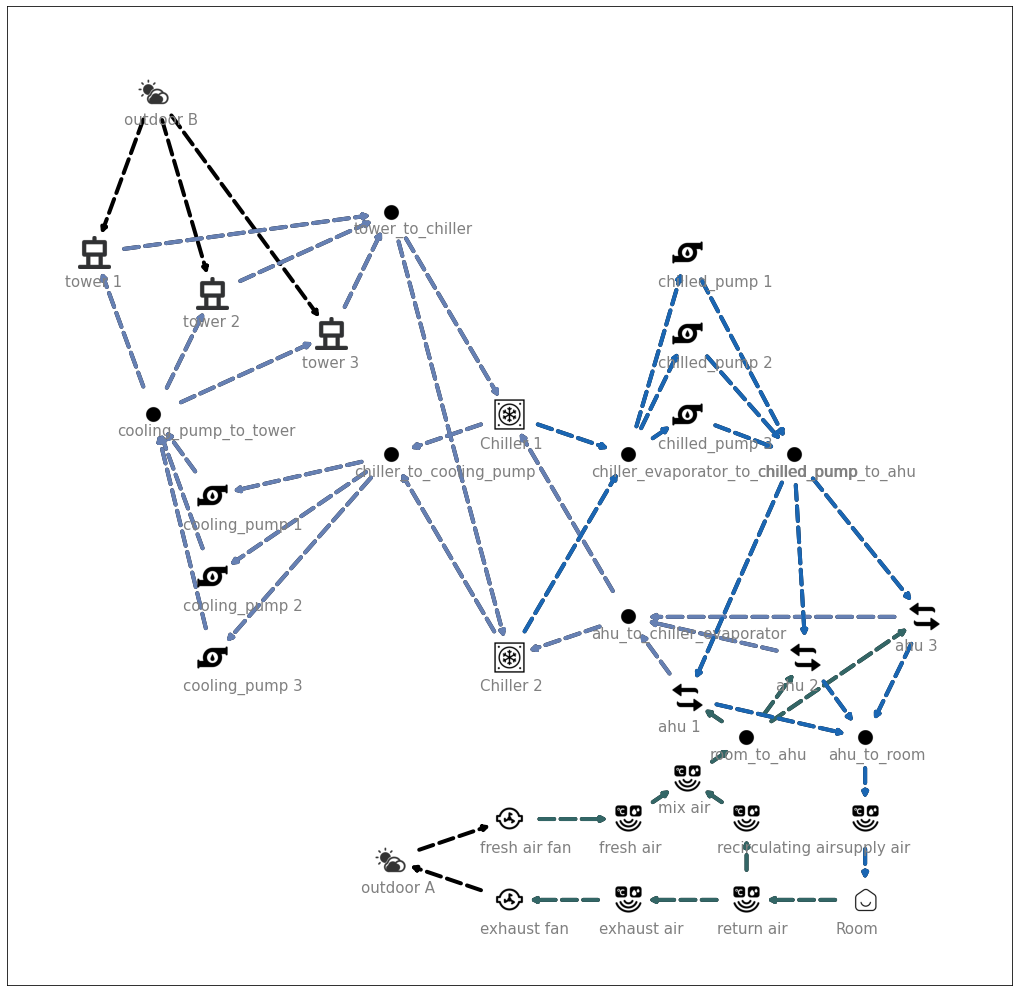

In [272]:
#三类连接线

# 待冷却
# 已冷却
# 处理空气中

#也可以后期运行的时候分成，有运行和没运行的差别
air_treatment = [(u,v) for (u, v) in graph.edges() if v in ['return air', 
'recirculating air', 'fresh air', 'exhaust air', 'exhaust fan', 'fresh air', 'mix air', 'room_to_ahu'] 
or (u, v) in [('room_to_ahu', 'ahu 1'), ('room_to_ahu', 'ahu 2'), ('room_to_ahu', 'ahu 3')]]

cooling_flow = [(u, v) for (u, v) in graph.edges() if v in ['ahu_to_chiller_evaporator', "chiller_to_cooling_pump", "cooling_pump 1",
 "cooling_pump 2", "cooling_pump 3", "cooling_pump_to_tower", "tower_to_chiller"] or 
 (u, v) in [('ahu_to_chiller_evaporator', 'Chiller 1'), ('ahu_to_chiller_evaporator', 'Chiller 2'), ('cooling_pump_to_tower', 'tower 1'),
 ('cooling_pump_to_tower', 'tower 2'), ('cooling_pump_to_tower', 'tower 3'), ("tower_to_chiller", "Chiller 1"),
  ("tower_to_chiller", "Chiller 2")]]

chilled_flow = [(u, v) for (u, v) in graph.edges() if v in [ "chiller_evaporator_to_chilled_pump", "chilled_pump 1",
 "chilled_pump 2", "chilled_pump 3", "chilled_pump_to_ahu", "ahu_to_room", "supply air", "Room"] or (u, v) in [ ("chilled_pump_to_ahu", "ahu 1"), ("chilled_pump_to_ahu", "ahu 2"), ("chilled_pump_to_ahu", "ahu 3")]]

fig, ax = plt.subplots(figsize = (18, 18))
nx.draw_networkx_edges(
    graph,
    pos = pos,
    ax = ax,
    arrows = True,
    arrowstyle = "-|>",
    min_source_margin= 30,
    min_target_margin= 20,
    width = 4,
    style = 'dashed',
    #edge_color = 'b'
)

nx.draw_networkx_edges(
    graph,
    pos = pos,
    ax = ax,
    edgelist= air_treatment,
    arrows = True,
    arrowstyle = "-|>",
    min_source_margin= 30,
    min_target_margin= 20,
    width = 4,
    style = 'dashed',
    edge_color = (0.2,0.4,0.4),
)

nx.draw_networkx_edges(
    graph,
    pos = pos,
    ax = ax,
    edgelist= cooling_flow,
    arrows = True,
    arrowstyle = "-|>",
    min_source_margin= 30,
    min_target_margin= 20,
    width = 4,
    style = 'dashed',
    edge_color = (0.4,0.5,0.7),
)

nx.draw_networkx_edges(
    graph,
    pos = pos,
    ax = ax,
    edgelist= chilled_flow,
    arrows = True,
    arrowstyle = "-|>",
    min_source_margin= 30,
    min_target_margin= 20,
    width = 4,
    style = '--',
    edge_color = (0.1,0.4,0.7),
)

trf_figure = ax.transData.transform

trf_axes = fig.transFigure.inverted().transform

icon_size = (ax.get_xlim()[1] - ax.get_xlim()[0]) * 0.003
icon_center = icon_size / 2.0
graph.add_node('Chiller 1', pos = (7, 6), type = 'device', object = Chiller_1, image = images["chiller"])
graph.add_node('Chiller 2', pos = (7, 3), type = 'device', object = Chiller_2, image = images["chiller"])


#add the respective image to each node

for n in graph.nodes:
    xf, yf = trf_figure(pos[n])
    xa, ya = trf_axes((xf, yf))
    #get overlapped axes and plot icon
    if graph.nodes('type')[n] == 'guide':
        a = plt.axes([xa - icon_center/2, ya - icon_center/2, icon_size/2, icon_size/2])
        plt.text(xa -  icon_center/2 - 350, ya - icon_center/2 + 350, n,fontsize = 15, color = 'grey')
    else:
        a = plt.axes([xa - icon_center, ya - icon_center, icon_size, icon_size])
        plt.text(xa -  icon_center - 80, ya - icon_center + 300, n,fontsize = 15, color = 'grey')
    
    #plt.text(xa - 50, ya + 250, n,fontsize = 15)
    a.imshow(graph.nodes[n]["image"])
    a.axis("off")


plt.show()




In [262]:
graph.nodes['ahu_to_chiller_evaporator']

{'pos': (8, 3.5),
 'type': 'guide',
 'image': <PIL.PngImagePlugin.PngImageFile image mode=P size=200x200 at 0x7FF4DEF25430>,
 'input_objects': [<__main__.AHU at 0x7ff4deb73790>,
 'output_objects': [<__main__.Chiller at 0x7ff4deb73d30>,
  <__main__.Chiller at 0x7ff4deb733a0>]}

Cooling flow涉及到  制冷机，冷冻泵，水塔

In [271]:
#COOLING FLOW流程模拟

# 跳过一步得到基础的Qe
ahu_1_Q = 10000
ahu_2_Q = 10000

#记录每一条线
ahu_1_T_w_L = 28
ahu_2_T_w_L = 26
ahu_3_T_w_L = 30

# 跳过一步分配
chillers['Chiller 1'].T_w_e_E = ahu_1_T_w_L 
chillers['Chiller 1'].Qe = ahu_1_Q
chillers['Chiller 2'].T_w_e_E = ahu_2_T_w_L 
chillers['Chiller 2'].Qe = ahu_2_Q




#最佳 Gw_e / 和 Te，Ncomp息息相关 / 最低水速 + 热损失 + 性能曲线 + 对空调和水塔的影响主动限制（上限？）四个方面
chillers['Chiller 1'].G_w_e = 40
chillers['Chiller 2'].G_w_e = 30


#假想这里 cooling_pump 1和 Chiller 1配上了，key对key/ input_key - output_key
cooling_pumps['Cooling_pump 1'].flow_rate = chillers['Chiller 1'].G_w_e
#3和2配上了
cooling_pumps['Cooling_pump 3'].flow_rate = chillers['Chiller 2'].G_w_e

#tower 1  + Cooling Pump 3 : Chiller 1
#tower 3 + Cooling Pump 2 : Chiller 2

# 假设设定相同水flow rate
# outdoorB的air flow rate主要根据室外条件设定
towers['tower 1'].G_w = cooling_pumps['Cooling_pump 3'].flow_rate
towers['tower 3'].G_w = cooling_pumps['Cooling_pump 2'].flow_rate


chillers['Chiller 1'].Tower = towers['tower 1']
chillers['Chiller 2'].Tower = towers['tower 3']

#最佳负荷分配
r1 = 0.8
r2 = 0.9

#最佳Te 
Te1 = 26
Te2 = 27

#从水塔进水温度开始设定冷冻流参数
#设定最可能适合的水塔进水温度
T_tower_w_E_1 = 20
T_tower_w_E_2 = 22

#空气流速设定/ 所有水塔统一
G_tower_a = 10
h_a_E = 300
h_as_E = 340 #有待理解的概念

# Chillers[Tower], Cooling Pumps一起跑

#假设 chilled_pump_1 配Chiller 1 和 ahu 1
# chilled_pump 2 配 Chiller 2 和 ahu 2
# 各自最佳Gw,c
gw_c = 23


chilled_pumps['Chilled_pump 1'].flow_rate = gw_c * 0.9
chilled_pumps['Chilled_pump 2'].flow_rate = gw_c * 0.8




In [268]:
Chiller_1.T_w_e_E

28